# Classifying Misinformation: Mendocino Complex Fire

# Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("./data/labeled_mendocino.csv")

## Text Tokenizing

In [2]:
df = pd.DataFrame()

In [3]:
df = data[['lemmatized_tweets', 'predictions']]
df.dropna(subset = ['lemmatized_tweets'], axis = 0, inplace = True)

/Users/danielgurzi/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
df0 = df[df['predictions'] == 0]
df1 = df[df['predictions'] == 1]
df2 = df[df['predictions'] == 2]
df3 = df[df['predictions'] == 3]
df4 = df[df['predictions'] == 4]
df5 = df[df['predictions'] == 5]
df6 = df[df['predictions'] == 6]
df_test = df6.head(10)


In [5]:
def counter(df):
    count_dict = {}
    for string in df['lemmatized_tweets']:
        parsed = string.split()
        for word in parsed:
            word_instances = string.count(word)
            if word in count_dict.keys():
                current_sum = count_dict[word]
                count_dict[word] = current_sum + word_instances
            else:
                key = word
                value = word_instances
                new_item = {key : value}
                count_dict.update(new_item)
    df = pd.DataFrame.from_dict(count_dict, orient = 'index')
    df['word'] = df.index
    df['word_count'] = df[0]
    df.drop(0, axis = 1, inplace = True)
    df.index = range(df.shape[0])
    return df
            
        


In [7]:
df_00 = counter(df0)
df_01 = counter(df1)
df_02 = counter(df2)
df_03 = counter(df3)
df_04 = counter(df4)
df_05 = counter(df5)

df_00.sort_values(by = ['word_count'], ascending = False, inplace = True)
df_01.sort_values(by = ['word_count'], ascending = False, inplace = True)
df_02.sort_values(by = ['word_count'], ascending = False, inplace = True)
df_03.sort_values(by = ['word_count'], ascending = False, inplace = True)
df_04.sort_values(by = ['word_count'], ascending = False, inplace = True)
df_05.sort_values(by = ['word_count'], ascending = False, inplace = True)

    

In [9]:
df_00.head(25)

,word,word_count
5,mendosheriff,2968
6,mendocinonf,2901
4,lakecosheriffca,2888
0,complex,2762
7,glenncountyoe,1850
2,update,1332
1,incident,1080
8,evacuation,996
89,mandatory,708
128,urgent,622


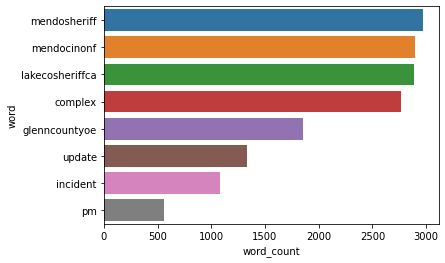

In [163]:
sns.barplot(x = 'word_count', y = 'word', data = df_00, orient = "h");

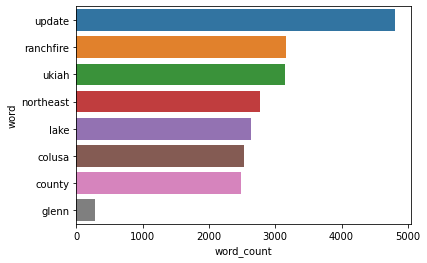

In [164]:
sns.barplot(x = 'word_count', y = 'word', data = df_01, orient = "h");

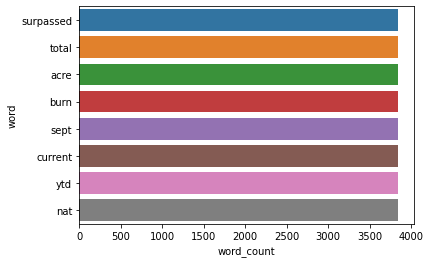

In [165]:
sns.barplot(x = 'word_count', y = 'word', data = df_02, orient = "h");

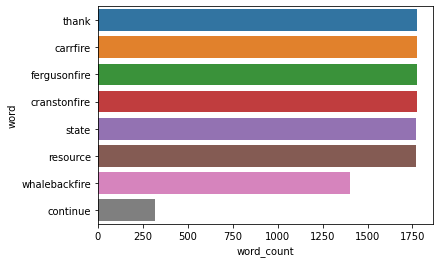

In [166]:
sns.barplot(x = 'word_count', y = 'word', data = df_03, orient = "h");

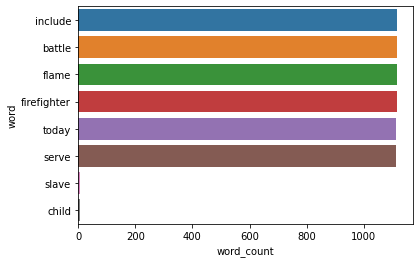

In [167]:
sns.barplot(x = 'word_count', y = 'word', data = df_04, orient = "h");

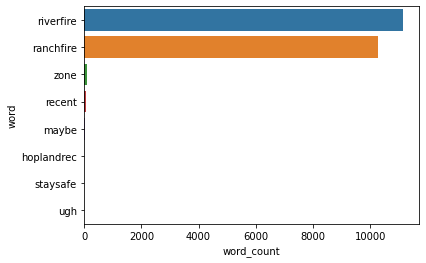

In [168]:
sns.barplot(x = 'word_count', y = 'word', data = df_05, orient = "h");